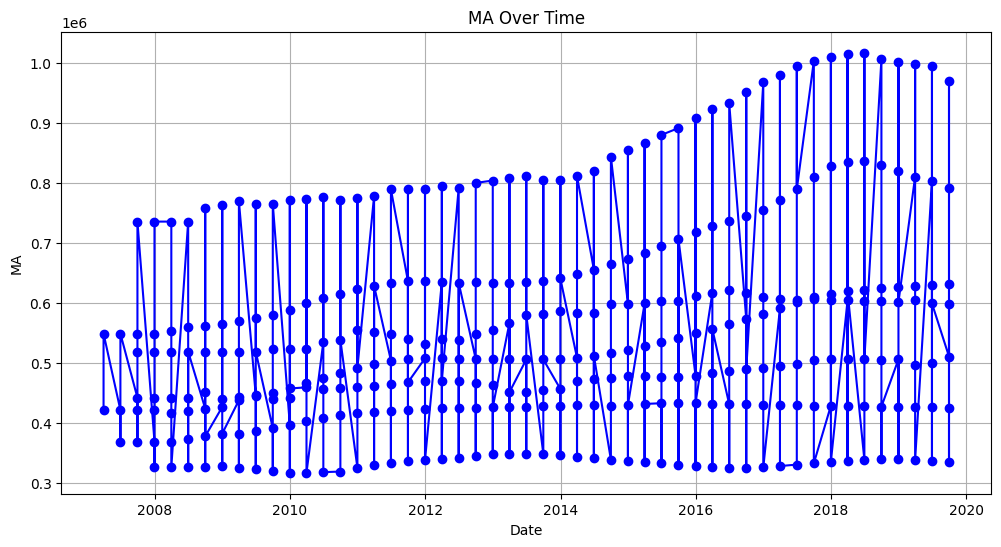

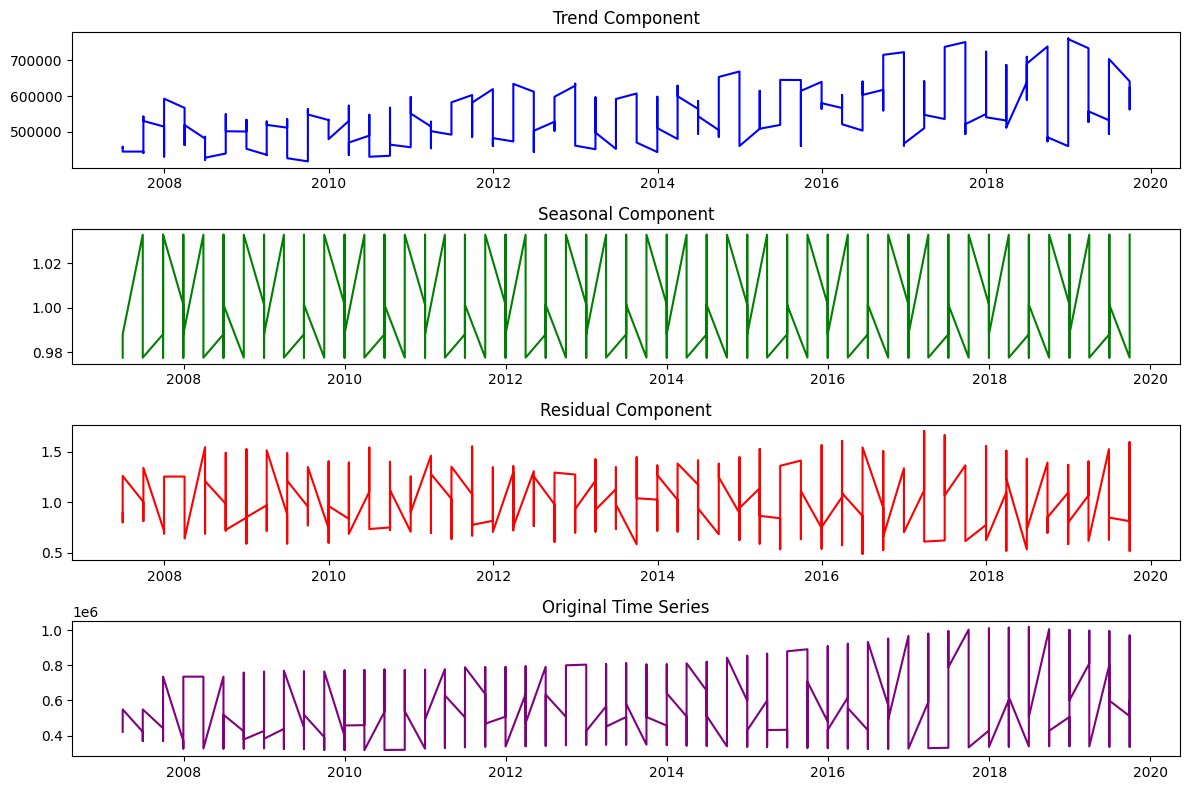

ADF Statistic: -14.43419495253526
p-value: 7.543131777272476e-27
Critical Values: {'1%': -3.4494474563375737, '5%': -2.8699542285903887, '10%': -2.5712527305187987}
The data is stationary.


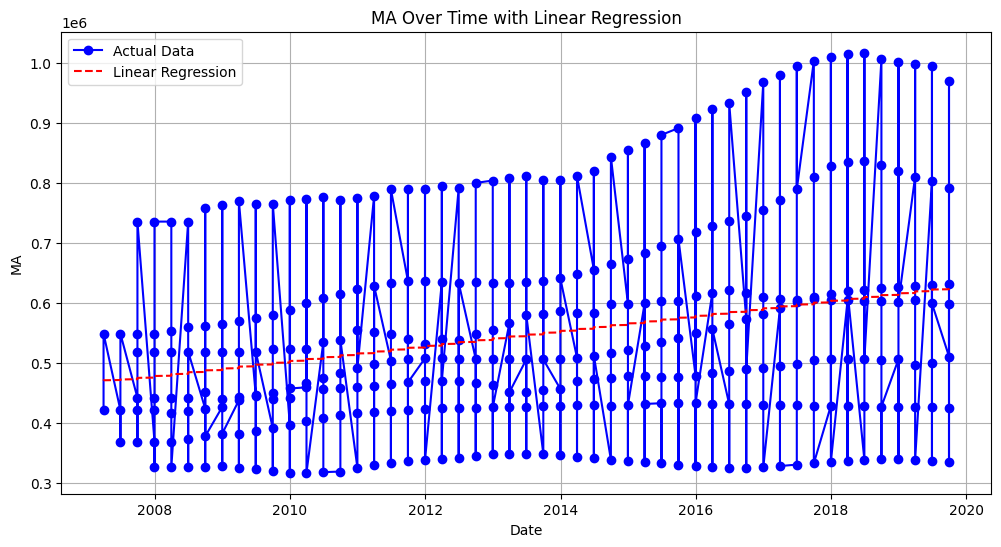

Slope (Coefficient): 448.16601192832
Intercept: 470599.25976349


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
file_path = "/content/ma_lga_12345.csv"
df = pd.read_csv(file_path)

# Convert 'saledate' to datetime format and sort by date
df['saledate'] = pd.to_datetime(df['saledate'], format="%d/%m/%Y")
df = df.sort_values(by='saledate')

# Set 'saledate' as index
df.set_index('saledate', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MA'], color='blue', marker='o', linestyle='-')
plt.title('MA Over Time')
plt.xlabel('Date')
plt.ylabel('MA')
plt.grid(True)
plt.show()

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['MA'], model='multiplicative', period=4)

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, color='blue')
plt.title('Trend Component')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, color='green')
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, color='red')
plt.title('Residual Component')

plt.subplot(4, 1, 4)
plt.plot(df['MA'], color='purple')
plt.title('Original Time Series')

plt.tight_layout()
plt.show()

# Check stationarity using Augmented Dickey-Fuller test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is non-stationary.")

check_stationarity(df['MA'])

# Prepare data for linear regression
df['time_index'] = np.arange(len(df))
X = df[['time_index']]
y = df['MA']

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MA'], color='blue', marker='o', linestyle='-', label='Actual Data')
plt.plot(df.index, y_pred, color='red', linestyle='--', label='Linear Regression')
plt.title('MA Over Time with Linear Regression')
plt.xlabel('Date')
plt.ylabel('MA')
plt.legend()
plt.grid(True)
plt.show()

# Display the slope and intercept
print(f"Slope (Coefficient): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
